# Finding the right Estimator

In this notebook, we examine how different estimators perform in our prediction pipeline. First, we load the required dependencies and the data.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders.one_hot import OneHotEncoder


from src import configuration as config
from src.pipeline.pipeline_factory import PipelineFactory, ModelType, EvaluationType

In [2]:
# load the data
train_df = config.load_traindata_for_regression()
pipelineFactory = PipelineFactory()

# create the baseline pipeline
pipeline = pipelineFactory.create_pipeline(
    train_df,
    ModelType.REGRE_PREPROCESSED,
    verbose_level=1,
    evaluation=EvaluationType.CROSS_VALIDATION
)

scores = {}

Creating pipeline ...


***
## 1) Evaluating Estimators

### 1.1) Baseline

In [3]:
from sklearn.dummy import DummyRegressor

pipeline.change_estimator(DummyRegressor())
pipeline.run()

scores['baseline'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:41<00:00,  8.23s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.0
    validation_average_spearman_fold_1: 0.0
    validation_average_spearman_fold_2: 0.0
    validation_average_spearman_fold_3: 0.0
    validation_average_spearman_fold_4: 0.0
    average of all folds: 0.0 [std=0.0]


### 1.2) Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression

pipeline.change_estimator(LinearRegression())
pipeline.run()

scores['linear_regression'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:43<00:00,  8.79s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.0822
    validation_average_spearman_fold_1: 0.0887
    validation_average_spearman_fold_2: 0.0718
    validation_average_spearman_fold_3: 0.0885
    validation_average_spearman_fold_4: 0.0743
    average of all folds: 0.0811 [std=0.007]


### 1.3) SVMs

In [5]:
from sklearn.svm import SVR

pipeline.change_estimator(SVR())
pipeline.run()

scores['svm'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:23<00:00, 28.61s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.1562
    validation_average_spearman_fold_1: 0.1501
    validation_average_spearman_fold_2: 0.1449
    validation_average_spearman_fold_3: 0.1484
    validation_average_spearman_fold_4: 0.1528
    average of all folds: 0.1505 [std=0.0038]


### 1.4) K-Nearest-Neighbours

In [6]:
from sklearn.neighbors import KNeighborsRegressor

pipeline.change_estimator(KNeighborsRegressor())
pipeline.run()

scores['knn'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:55<00:00, 11.16s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.3858
    validation_average_spearman_fold_1: 0.3578
    validation_average_spearman_fold_2: 0.3687
    validation_average_spearman_fold_3: 0.3785
    validation_average_spearman_fold_4: 0.3752
    average of all folds: 0.3732 [std=0.0095]


### 1.5) Decision Trees

In [7]:
from sklearn.tree import DecisionTreeRegressor

pipeline.change_estimator(DecisionTreeRegressor())
pipeline.run()

scores['decision_tree'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.76s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.4671
    validation_average_spearman_fold_1: 0.4771
    validation_average_spearman_fold_2: 0.4751
    validation_average_spearman_fold_3: 0.4906
    validation_average_spearman_fold_4: 0.5153
    average of all folds: 0.485 [std=0.0169]


### 1.6) Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestRegressor

pipeline.change_estimator(RandomForestRegressor())
pipeline.run()

scores['random_forest'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:24<00:00, 28.92s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.4676
    validation_average_spearman_fold_1: 0.4723
    validation_average_spearman_fold_2: 0.4825
    validation_average_spearman_fold_3: 0.4895
    validation_average_spearman_fold_4: 0.4852
    average of all folds: 0.4794 [std=0.0082]


### 1.7) Light Gradient Boosting Machine

In [9]:
from lightgbm import LGBMRegressor

pipeline.change_estimator(LGBMRegressor())
pipeline.run()

scores['lgbm'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:57<00:00, 11.49s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.2868
    validation_average_spearman_fold_1: 0.3285
    validation_average_spearman_fold_2: 0.3057
    validation_average_spearman_fold_3: 0.2972
    validation_average_spearman_fold_4: 0.3195
    average of all folds: 0.3075 [std=0.015]


### 1.8) Neural Networks

In [10]:
from sklearn.neural_network import MLPRegressor

pipeline.change_estimator(MLPRegressor())
pipeline.run()

scores['neural_network'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:15<00:00, 15.19s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.1422
    validation_average_spearman_fold_1: 0.1228
    validation_average_spearman_fold_2: 0.147
    validation_average_spearman_fold_3: 0.1547
    validation_average_spearman_fold_4: 0.127
    average of all folds: 0.1387 [std=0.0121]


***
## 2) Comparing Estimators

decision_tree        0.485047
random_forest        0.479428
knn                  0.373191
lgbm                 0.307539
svm                  0.150474
neural_network       0.138741
linear_regression    0.081094
baseline             0.000000
dtype: float64

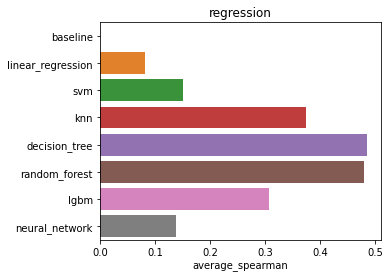

In [11]:
scores_df = pd.DataFrame(scores)
scores_df = scores_df.applymap(lambda x: x[0] if isinstance(x, list) else x)
scores_df.index = scores_df.index.str.replace('validation_', '')
scores_df = scores_df.rename_axis('metric')

scores_df = scores_df.mean()
display(scores_df.sort_values(ascending=False))
sns.barplot(x=scores_df, y=scores_df.index)
plt.title('regression')
plt.xlabel('average_spearman')
plt.gcf().subplots_adjust(left=0.25)
plt.savefig('regression_estimator_comparison.svg')
plt.show()

In our evaluations, the decision tree performed the best regarding the average spearman correlation. Therefore, we will focus on this model in the tuning phase.

### Grid Search

Grid Search for LGBM-Regressor:

In [ ]:
# LGBM-Regressor
param_grid = {
    'estimator__learning_rate': [0.1, 0.01, 0.001],
    'estimator__n_estimators': [100, 200, 500],
    'estimator__max_depth': [3, 5, 7],
    'estimator__num_leaves': [31, 50, 100],
    'estimator__subsample': [0.8, 1.0],
    'estimator__colsample_bytree': [0.8, 1.0]
}

In [ ]:
# load the data
train_df = config.load_traindata_for_regression()
pipelineFactory = PipelineFactory()

# create the baseline pipeline
pipeline = pipelineFactory.create_pipeline(
    train_df,
    ModelType.REGRE_PREPROCESSED,
    verbose_level=1,
    evaluation=EvaluationType.GRID_SEARCH,
    param_grid=param_grid
)
pipeline.clear_steps()
pipeline.add_new_step(OneHotEncoder(), 'onehot')
pipeline.change_estimator(LGBMRegressor())

pipeline.run()
scores = {}

Evaluation metrics:
    best_score: 0.3675
    best_params: {'estimator__learning_rate': 0.1, 'estimator__n_estimators': 500, 'estimator__max_depth': 7, 'estimator__num_leaves': 100, 'estimator__subsample': 0.8, 'estimator__colsample_bytree': 1.0}

Grid Search for DecisionTree Regressor:

In [ ]:
parameters={"estimator__splitter":["best","random"],
            "estimator__max_depth" : [1,3,5,7,9],
           "estimator__min_samples_leaf":[1,2,3,4,],
           "estimator__max_features":["auto","log2","sqrt",None],
           "estimator__max_leaf_nodes":[None,10,20,30,40] }

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# load the data
train_df = config.load_traindata_for_regression()
pipelineFactory = PipelineFactory()

# create the baseline pipeline
pipeline = pipelineFactory.create_pipeline(
    train_df,
    ModelType.REGRE_PREPROCESSED,
    verbose_level=1,
    evaluation=EvaluationType.GRID_SEARCH,
    param_grid=parameters
)
pipeline.clear_steps()
pipeline.add_new_step(OneHotEncoder(), 'onehot')
pipeline.change_estimator(DecisionTreeRegressor())

pipeline.run()
scores = {}

Evaluation metrics:
    best_score: 0.2319
    best_params: {'estimator__splitter': 'best', 'estimator__max_depth': 9, 'estimator__min_samples_leaf': 1, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None}